# Experiments for Rank Difference in JIF versus In Text JIF

Below we outline the experiments we undertook to investigate the differences in the ranking of the journals in the JIF and In Text JIF.

### Experiment #0:
- How does JIF Rank and In_text JIF Rank correlate?

### Experiment #1: 
- What are the top 10 Journals that had the most notable difference in the ranking of - the journals in the JIF and In Text JIF?
- Which journals were largely unchanged?
- Were ranking changes proportional or did some increase and some decrease?

### Experiment #2:
- If we group by OA and Non-OA what Ranking changes do we see?
- If we group by Subjects what Ranking changes do we see?

In [299]:
import pandas as pd
import seaborn as sns

In [300]:
ranking_2019 = pd.read_csv('./data/ranking_2019_with_subject_and_oa.csv').drop_duplicates('journal_id')

In [301]:
ranking_2019.head()

,title,journal_id,articles_from_past_two_years,citations_to_past_two_years,in_text_citations_to_past_two_years,jif,in_text_jif,issns,is_oa,oa_status,issns_clean,domain,field,subfield
0,ca a cancer journal for clinicians,141961,132,11243,14649,85,110,"['0007-9235', '1542-4863']",True,gold,"['00079235', '15424863']",Health Sciences,Clinical Medicine,Oncology & Carcinogenesis
1,reviews of modern physics,128974,86,3289,5846,38,67,['0034-6861'],True,green,['00346861'],Natural Sciences,Physics & Astronomy,Fluids & Plasmas
2,living reviews in relativity,145792,30,1092,2078,36,69,"['2367-3613', '1433-8351']",True,gold,"['23673613', '14338351']",Natural Sciences,Physics & Astronomy,Nuclear & Particle Physics
3,mmwr recommendations and reports,115498,10,348,602,34,60,"['1057-5987', '1545-8601']",True,gold,"['10575987', '15458601']",Health Sciences,Biomedical Research,Microbiology
4,annual review of astronomy and astrophysics,120462,64,1606,2274,25,35,"['0066-4146', '1545-4282']",True,green,"['00664146', '15454282']",Natural Sciences,Physics & Astronomy,Astronomy & Astrophysics


In [302]:
in_text_jif_rank_dict = {
    item[1]['journal_id']: rank + 1 for rank, item in
    enumerate(ranking_2019.sort_values(by='in_text_jif', ascending=False)[['journal_id', 'in_text_jif']].iterrows())
}
ranking_2019['in_text_jif_rank'] = ranking_2019['journal_id'].map(in_text_jif_rank_dict)

In [303]:
jif_rank_dict = {
    item[1]['journal_id']: rank + 1 for rank, item in
    enumerate(ranking_2019.sort_values(by='jif', ascending=False)[['journal_id', 'jif']].iterrows())
}
ranking_2019['jif_rank'] = ranking_2019['journal_id'].map(jif_rank_dict)

In [304]:
ranking_2019['ranking_difference'] = ranking_2019['jif_rank'] - ranking_2019['in_text_jif_rank']

### Experiment #0:
- How does JIF Rank and In_text JIF Rank correlate?

In [305]:
ranking_2019[['jif_rank', 'in_text_jif_rank']].corr(method='spearman')

,jif_rank,in_text_jif_rank
jif_rank,1.000000,0.709291
in_text_jif_rank,0.709291,1.000000


In [306]:
# ranking_2019[(ranking_2019['in_text_jif_rank'] > 30000) & (ranking_2019['jif_rank'] > 10000) & (ranking_2019['jif_rank'] < 20000)]

Text(0, 0.5, 'In-text JIF Rank')

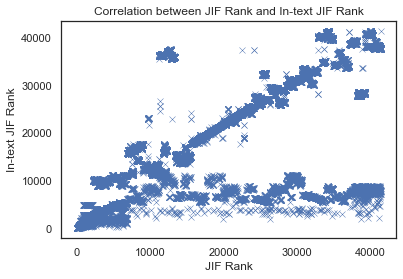

In [307]:
sns.set_theme(style="white")
ax = sns.scatterplot(
    data=ranking_2019[['jif_rank', 'in_text_jif_rank']],
    x='jif_rank', y='in_text_jif_rank', marker='x'
)
ax.set_title('Correlation between JIF Rank and In-text JIF Rank')
ax.set_xlabel('JIF Rank')
ax.set_ylabel('In-text JIF Rank')

#     title='Correlation between JIF Rank and In Text JIF Rank',
#     xlabel='JIF Rank', ylabel='In Text JIF Rank'

In [308]:
ranking_2019.sort_values('jif_rank',ascending = True)[:500][['jif_rank', 'in_text_jif_rank']].corr(method='spearman')

,jif_rank,in_text_jif_rank
jif_rank,1.000000,0.838128
in_text_jif_rank,0.838128,1.000000


In [309]:
stds = []
bin_size = 100
bin_pos = 0
for i in range(len(ranking_2019) // bin_size):
    stds.append(ranking_2019.sort_values('jif_rank',ascending = True)['ranking_difference'][bin_pos:bin_pos+bin_size].std())
    bin_pos += bin_size


Text(0, 0.5, 'Standard Deviation')

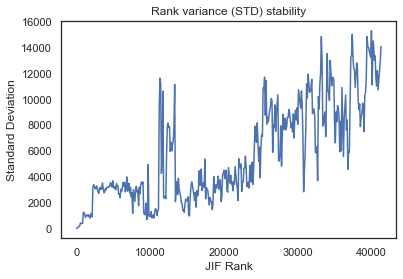

In [310]:
ax = sns.lineplot(
    x=[i*100 for i in range(len(ranking_2019) // bin_size)],
    y=stds
)
ax.set_title('Rank variance (STD) stability')
ax.set_xlabel('JIF Rank')
ax.set_ylabel('Standard Deviation')

Text(0, 0.5, 'Ranking Difference')

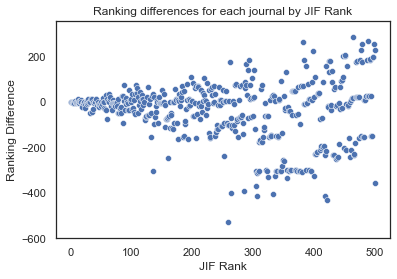

In [311]:

ax = sns.scatterplot(data=ranking_2019.sort_values('jif_rank',ascending = True)[:500], x='jif_rank', y='ranking_difference')
ax.set_ylim(-600)
ax.set_title('Ranking differences for each journal by JIF Rank')
ax.set_xlabel('JIF Rank')
ax.set_ylabel('Ranking Difference')


### Experiment #1: 
- What are the top 10 Journals that had the most notable difference in the ranking of - the journals in the JIF and In Text JIF?
- Stable rankings?
- Pairwise Rankings?
- Whose JIF and Intext JIF deviates from the mean?

In [312]:
ranking_2019.loc[(ranking_2019['jif_rank'] <= 100) | (ranking_2019['in_text_jif_rank'] <= 100)].sort_values('ranking_difference').head(25)[[
    'title','field', 'jif_rank', 'in_text_jif_rank', 'ranking_difference', 'articles_from_past_two_years', 'citations_to_past_two_years',	'in_text_citations_to_past_two_years'
]].to_csv('./top_25_in_100_ranking_shifts_negative.csv')

In [313]:
ranking_2019.loc[(ranking_2019['jif_rank'] <= 100) | (ranking_2019['in_text_jif_rank'] <= 100)].sort_values('ranking_difference').tail(25)[[
'title','field', 'jif_rank', 'in_text_jif_rank', 'ranking_difference', 'articles_from_past_two_years', 'citations_to_past_two_years',	'in_text_citations_to_past_two_years'
]].to_csv('./top_25_in_100_ranking_shifts_positive.csv')

## Experiment #2:¶
If we group by Subjects what Ranking changes do we see?

If we group by OA and Non-OA what Ranking changes do we see?

In [314]:
corrs = []
for field in ranking_2019.field.unique():
    if field == 'article-level classification' or not field:
        continue
    corrs.append({
        "field": field,
        "corr": ranking_2019[
            ranking_2019['field'] == field
        ][['jif_rank', 'in_text_jif_rank']].corr(method='spearman')['jif_rank']['in_text_jif_rank']
    })
corr_df = pd.DataFrame(corrs)

In [315]:
corr_df.sort_values('corr')

,field,corr
16,"Agriculture, Fisheries & Forestry",0.581138
17,Built Environment & Design,0.601134
10,Mathematics & Statistics,0.612796
13,Engineering,0.640443
3,Public Health & Health Services,0.648319
15,Social Sciences,0.658585
7,Information & Communication Technologies,0.691731
18,Communication & Textual Studies,0.701250
9,Biology,0.707648
11,Earth & Environmental Sciences,0.710252


In [316]:
corr_df.sort_values('corr').tail(4)

,field,corr
14,Historical Studies,0.779195
20,Visual & Performing Arts,0.821351
2,Biomedical Research,0.856268
4,NaN,NaN


In [317]:
ranking_2019.groupby('field').agg({'jif_rank': 'median', 'in_text_jif_rank': 'median'}).sort_values('jif_rank')

,jif_rank,in_text_jif_rank
field,,
Biomedical Research,5059.5,5167.5
Earth & Environmental Sciences,16119.5,9723.0
Clinical Medicine,16173.5,9610.5
article-level classification,17053.0,12702.0
Psychology & Cognitive Sciences,18064.0,9395.0
Enabling & Strategic Technologies,18230.0,11221.0
Information & Communication Technologies,18405.5,10087.0
"Agriculture, Fisheries & Forestry",18766.5,10689.0
Chemistry,19175.0,11001.5


In [318]:
ranking_2019.groupby('field').agg({'jif_rank': 'median', 'in_text_jif_rank': 'median'}).sort_values('in_text_jif_rank')

,jif_rank,in_text_jif_rank
field,,
Biomedical Research,5059.5,5167.5
Mathematics & Statistics,24307.0,9156.0
Psychology & Cognitive Sciences,18064.0,9395.0
Clinical Medicine,16173.5,9610.5
Earth & Environmental Sciences,16119.5,9723.0
Information & Communication Technologies,18405.5,10087.0
Public Health & Health Services,24117.5,10594.0
"Agriculture, Fisheries & Forestry",18766.5,10689.0
Economics & Business,19414.5,10859.5


In [319]:
test = ranking_2019.groupby('field').agg({'title': 'count', 'jif_rank': 'median', 'in_text_jif_rank': 'median'}).sort_values('in_text_jif_rank')

In [320]:
test['rank_difference'] = test['jif_rank']	- test['in_text_jif_rank']
test = test.merge(corr_df, on='field')

In [321]:
test.to_csv('./subject_ranking.csv')
test.sort_values(by='rank_difference', ascending=False)

,field,title,jif_rank,in_text_jif_rank,rank_difference,corr
1,Mathematics & Statistics,701,24307.0,9156.0,15151.0,0.612796
6,Public Health & Health Services,902,24117.5,10594.0,13523.5,0.648319
2,Psychology & Cognitive Sciences,733,18064.0,9395.0,8669.0,0.755288
11,Physics & Astronomy,670,19890.0,11232.0,8658.0,0.751525
8,Economics & Business,1506,19414.5,10859.5,8555.0,0.730759
5,Information & Communication Technologies,900,18405.5,10087.0,8318.5,0.691731
9,Chemistry,598,19175.0,11001.5,8173.5,0.750219
7,"Agriculture, Fisheries & Forestry",652,18766.5,10689.0,8077.5,0.581138
14,Engineering,1168,22216.0,14254.0,7962.0,0.640443
12,Biology,948,20374.0,12447.5,7926.5,0.707648


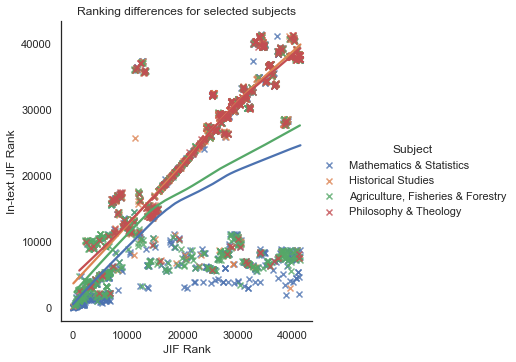

In [322]:
ax = sns.lmplot(x='jif_rank', y='in_text_jif_rank', data=ranking_2019[ranking_2019.field.isin([ 'Mathematics & Statistics', 'Agriculture, Fisheries & Forestry', 'Historical Studies','Philosophy & Theology',])], lowess=True, hue='field', markers='x')

ax.ax.set_title('Ranking differences for selected subjects')
ax.ax.set_xlabel('JIF Rank')
ax.ax.set_ylabel('In-text JIF Rank')
ax._legend.set_title('Subject')

# OA

In [323]:
corrs = []
for oa_status in ranking_2019.oa_status.unique():
    if not field:
        continue
    corrs.append({
        "oa_status": oa_status,
        "corr": ranking_2019[
            ranking_2019['oa_status'] == oa_status
        ][['jif_rank', 'in_text_jif_rank']].corr(method='spearman')['jif_rank']['in_text_jif_rank']
    })
corr_df = pd.DataFrame(corrs)

In [324]:
corr_df

,oa_status,corr
0,gold,0.750656
1,green,0.757223
2,closed,0.672286
3,bronze,0.734970
4,hybrid,0.709893
5,NaN,NaN


In [325]:
test = ranking_2019.groupby('is_oa').agg({'jif_rank': 'median', 'in_text_jif_rank': 'median'}).sort_values('in_text_jif_rank')
test['rank_difference'] = test['jif_rank']	- test['in_text_jif_rank']


In [326]:
test = ranking_2019.groupby('oa_status').agg({'title': 'count', 'jif_rank': 'median', 'in_text_jif_rank': 'median'}).sort_values('in_text_jif_rank')
test['rank_difference'] = test['jif_rank']	- test['in_text_jif_rank']
test = test.merge(corr_df, on='oa_status')
test.to_csv('./oa_ranking.csv')
test

,oa_status,title,jif_rank,in_text_jif_rank,rank_difference,corr
0,green,2697,15535.0,8624.0,6911.0,0.757223
1,hybrid,1940,18395.0,17829.0,566.0,0.709893
2,bronze,2962,19086.0,19000.5,85.5,0.734970
3,closed,12773,25295.0,21101.0,4194.0,0.672286
4,gold,17552,19599.5,21560.5,-1961.0,0.750656


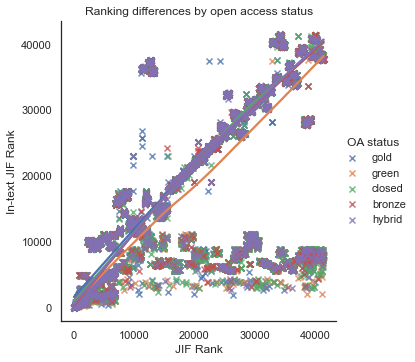

In [327]:
ax = sns.lmplot(x='jif_rank', y='in_text_jif_rank', data=ranking_2019, lowess=True, hue='oa_status', markers='x')
ax.ax.set_title('Ranking differences by open access status')
ax.ax.set_xlabel('JIF Rank')
ax.ax.set_ylabel('In-text JIF Rank')
ax._legend.set_title('OA status')